In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

from utils import *

%load_ext autoreload
%autoreload 2

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Loading data and cleaning

In [2]:
data = pd.read_csv(r'x:\CAO\Team\Data Science\performance_link\Bayesian_MLR_Starkis\data\STARKIST_MODEL_NBR_1_DT043021_VERSION1.csv').iloc[:,:-1]

In [3]:
data.head()

,DIGITAL_HX,DIGITAL_TREMOR,DIGITAL_OGURY,TV_PRIMEACCESS,TV_LATEFRINGE,TV_PRIME,TV_DAYTIME,TV_EARLYMORNING,TV_EARLYFRINGE,TV_OVERNIGHT,...,TV_SMITHSONIANNETWORK,TV_SYFY,TV_THELEARNINGCHANNEL,TV_TRUTV,TV_TVONE,TV_USANETWORK,TV_VH1,TV_WETV,TOTAL_IMPS,TOTAL_CONV
0,1.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.39,16
1,1.00,0.0,0.0,13.0,11.0,34.0,23.0,0.0,43.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.00,0
2,13.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.00,0
3,0.00,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.00,0
4,0.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00,0


In [4]:
# checking for Nan values in columns
data.isna().sum().sum()

0

### Checking target distribution

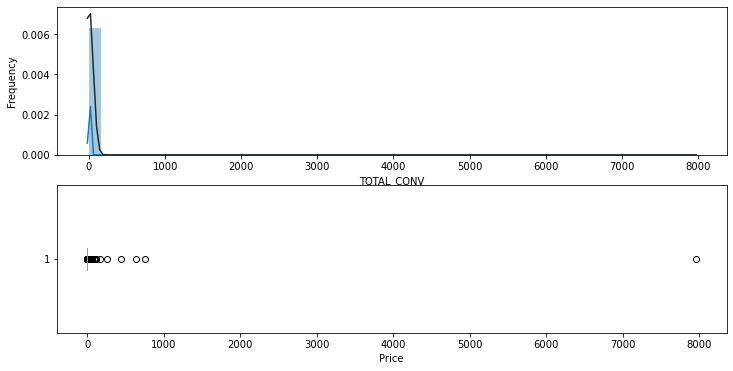

In [5]:
target_distribution(data.TOTAL_CONV)

In [7]:
data[data['TOTAL_CONV']>500]

,DIGITAL_HX,DIGITAL_TREMOR,DIGITAL_OGURY,TV_PRIMEACCESS,TV_LATEFRINGE,TV_PRIME,TV_DAYTIME,TV_EARLYMORNING,TV_EARLYFRINGE,TV_OVERNIGHT,...,TV_SMITHSONIANNETWORK,TV_SYFY,TV_THELEARNINGCHANNEL,TV_TRUTV,TV_TVONE,TV_USANETWORK,TV_VH1,TV_WETV,TOTAL_IMPS,TOTAL_CONV
180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7956
375,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,637
4719,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,752


In [11]:
# checking for rows where total impresions == 0
data = data.drop(index=data[data.TOTAL_IMPS==0].index[0]) 

data = data.drop(columns=['TOTAL_IMPS'])
#data = data.loc[data['TOTAL_CONV']>0] # Select only with CONV RATE > 0  & (data['TOTAL_CONV']<500)

# Checking for sum of 0 values in the columns
# Summing up values by columns and extracts columns with sum = 0
data = data[[col for col in data.columns if col not in data.sum(axis=0)[data.sum(axis=0)==0].index]]

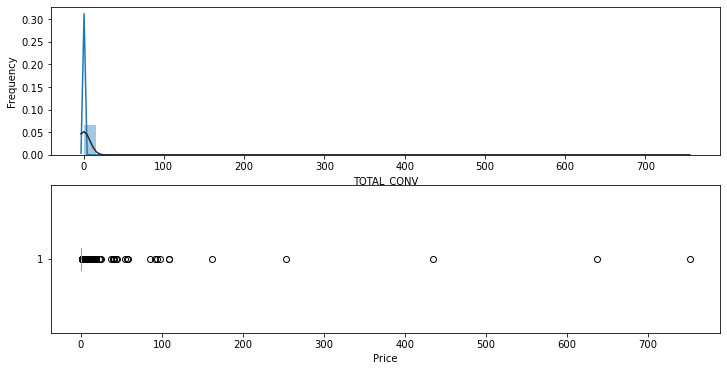

In [13]:
target_distribution(data.TOTAL_CONV)

### Checking for Multicolinearity

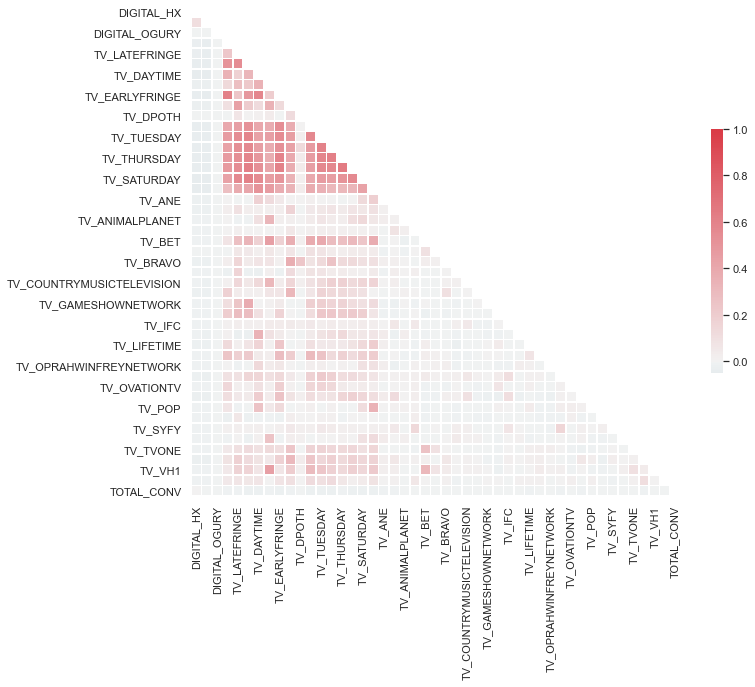

Based on threshold 0.8 , there is no highly corelated features


In [14]:
features_corr_matrix(data, 0.8)

### Grouping Channels

In [15]:
tv_digital = data[['DIGITAL_HX','DIGITAL_TREMOR','TOTAL_CONV']]

In [16]:
tv_data = data[['TV_MONDAY','TV_TUESDAY','TV_WEDNESDAY','TV_THURSDAY','TV_FRIDAY','TV_SATURDAY','TV_SUNDAY','TOTAL_CONV']]

In [17]:
tv_daypart = data[['TV_PRIMEACCESS','TV_LATEFRINGE','TV_PRIME','TV_DAYTIME','TV_EARLYMORNING','TV_EARLYFRINGE','TV_OVERNIGHT','TOTAL_CONV']]

In [18]:
tv_network = data[['TV_ANE','TV_AMC','TV_ANIMALPLANET','TV_BBCAMERICA','TV_BET','TV_BETHER','TV_BRAVO','TV_COMEDYCENTRAL',
                   'TV_COUNTRYMUSICTELEVISION','TV_FOODNETWORK','TV_GAMESHOWNETWORK','TV_IFC','TV_INVESTIGATIONDISCOVERY',
                   'TV_LIFETIME','TV_LIFETIMEMOVIES','TV_OPRAHWINFREYNETWORK','TV_OTHER','TV_OVATIONTV','TV_PARAMOUNTNETWORK',
                   'TV_POP','TV_SMITHSONIANNETWORK','TV_SYFY','TV_TRUTV','TV_TVONE','TV_USANETWORK','TV_VH1','TV_WETV','TOTAL_CONV']]

### Relationship with Target Variable

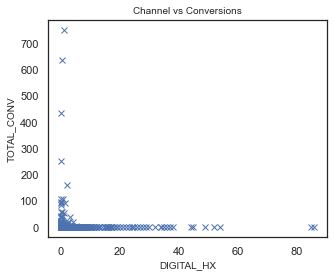

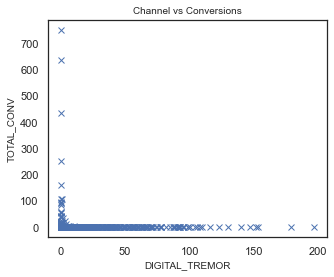

In [19]:
plot_relationship(tv_digital, 'TOTAL_CONV')

### Saving Data to CSV files

In [20]:
tv_digital.to_csv(r'x:\CAO\Team\Data Science\performance_link\Bayesian_MLR_Starkis\data\tv_digital.csv', index = False)
tv_data.to_csv(r'x:\CAO\Team\Data Science\performance_link\Bayesian_MLR_Starkis\data\tv_data.csv', index = False)
tv_daypart.to_csv(r'x:\CAO\Team\Data Science\performance_link\Bayesian_MLR_Starkis\data\tv_daypart.csv', index = False)
tv_network.to_csv(r'x:\CAO\Team\Data Science\performance_link\Bayesian_MLR_Starkis\data\tv_network.csv', index = False)